# Project - Write a Data Science Blog Post

In [1]:

# 6 steps of CRISP-DM (Cross-Industry Standard Process for Data Mining):
# 1.Business Understanding
# 2.Data Understanding
# 3.Data Preparation
# 4.Modelling
# 5.Evaluation
# 6.Deployment

In [2]:
# Business Understanding
# Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA
# These millions of listings generate a lot of data, which can be analysed and used for a variety of purposes, including security, business decisions, understanding customer and provider (host) behaviour and performance on the platform, guiding marketing initiatives, and implementing innovative additional services, among others.
# The following Airbnb activity is included in this Seattle dataset:
# •Listings, including full descriptions and average review score
# •Calendar, including listing id and the price and availability for that day

# 4 business questions:
# 1.Comparison of average price on weekend vs weekday.
# 2.Monthly and yearly trend of average price.
# 3.Correlation of review_scores_rating,property_type,room_type,bedrooms with the price of listings.
# 4.Factors impacting Price through Linear Regression model technique.

In [1]:
# Useful packages
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
# sb.set(style="white") #white background style for seaborn plots
# sb.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
#import matplotlib.offline as pyoff
#import matplotlib.graph_objs as go
plt.rc("font", size=14)
import time as tm
from datetime import datetime
import operator
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [27]:
#quick look at what the data looks like
data_c = pd.read_csv("calendar.csv", encoding='latin-1', low_memory=False)
data_c.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [28]:
#Checking how many rows and cols
nRowsRead = None
data_c = pd.read_csv('calendar.csv', delimiter=',', nrows = nRowsRead)
data_c.dataframeName = 'calendar.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1393570 rows and 4 columns


In [31]:
#Checking null values
data_c.isnull()

,listing_id,date,available,price
0,False,False,False,False
1,False,False,False,False
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,False,False,False,True
6,False,False,False,True
7,False,False,False,True
8,False,False,False,True
9,False,False,False,False


In [32]:
#Checking percentage of null values
df_describe = data_c.describe(include='all').transpose()
df_describe['% null'] = data_c.isnull().sum() / data_c.shape[0] 
df_describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,% null
listing_id,1.39357e+06,NaN,NaN,NaN,5.55011e+06,2.96227e+06,3335,3.25821e+06,6.11824e+06,8.03521e+06,1.03402e+07,0.00000
date,1393570,365,2016-11-10,3818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
available,1393570,2,t,934542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
price,934542,669,$150.00,36646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.32939


In [34]:
#function to clean and convert str columns to numeric
def str_to_num(df,column):
    df[column] = pd.to_numeric(df[column].apply(lambda x : str(x).replace('$','').replace(",",'')),errors='coerce')
    return df

columns = ['price']

for col in columns:
    data_c = str_to_num(data,col)

data_c[columns][:5]

,price
0,85.0
1,85.0
2,NaN
3,NaN
4,NaN


In [35]:
#Removing null values
data_c.dropna(axis=0,subset=['price'],inplace=True)

In [36]:
# change the date column to a datetime 
data_c['date'] = pd.to_datetime(data_c.date)
data_c.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [37]:
data_c.describe()

,listing_id,price
count,9.345420e+05,934542.000000
mean,5.305517e+06,137.944859
std,2.974821e+06,105.062870
min,3.335000e+03,10.000000
25%,2.875975e+06,75.000000
50%,5.615620e+06,109.000000
75%,7.873345e+06,160.000000
max,1.034016e+07,1650.000000


In [38]:
# add month,year and weekday column to the calender dataset
data_c['month'],data_c['year'],data_c['Dayofweek'] = data_c.date.dt.month,data_c.date.dt.year,data_c.date.dt.weekday
data_c.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 7 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null object
price         934542 non-null float64
month         934542 non-null int64
year          934542 non-null int64
Dayofweek     934542 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 57.0+ MB


In [39]:
# check if the date is weekend or not 
data_c['IsWeekend'] = data_c['Dayofweek'] >= 5

print(data_c)

         listing_id       date available  price  month  year  Dayofweek  IsWeekend
0            241032 2016-01-04         t   85.0      1  2016          0      False
1            241032 2016-01-05         t   85.0      1  2016          1      False
9            241032 2016-01-13         t   85.0      1  2016          2      False
10           241032 2016-01-14         t   85.0      1  2016          3      False
14           241032 2016-01-18         t   85.0      1  2016          0      False
15           241032 2016-01-19         t   85.0      1  2016          1      False
16           241032 2016-01-20         t   85.0      1  2016          2      False
20           241032 2016-01-24         t   85.0      1  2016          6       True
21           241032 2016-01-25         t   85.0      1  2016          0      False
22           241032 2016-01-26         t   85.0      1  2016          1      False
23           241032 2016-01-27         t   85.0      1  2016          2      False
24  

# 1.Comparison of average price on weekend vs weekday.

In [40]:
w_price= data_c.groupby('IsWeekend')['price'].agg('mean').reset_index()
print(w_price)

   IsWeekend       price
0      False  137.198889
1       True  139.817855


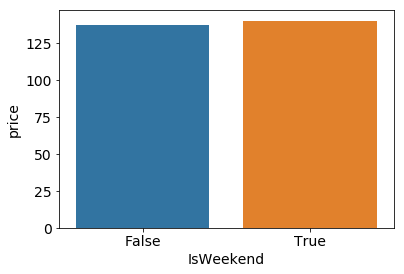

In [41]:
sns.barplot(x=w_price['IsWeekend'],y=w_price['price'])
plt.show()

# 2.Monthly and yearly trend of average price.

In [43]:
year_trend= data_c.groupby('year')['price'].agg('mean').reset_index()
print(year_trend)

   year       price
0  2016  137.951375
1  2017  136.882590


In [45]:
month_trend= data_c.groupby('month')['price'].agg('mean').reset_index()
print(month_trend)

    month       price
0       1  122.912176
1       2  124.293927
2       3  128.644488
3       4  135.097005
4       5  139.538183
5       6  147.473137
6       7  152.094150
7       8  150.656594
8       9  143.255949
9      10  137.031939
10     11  135.688738
11     12  137.251835


In [46]:
data_c['year'] = data_c['year'].astype(str)
data_c['month'] = data_c['month'].astype(str)

In [47]:
data_c['yr_mm'] = data_c['year'] + ' ' +data_c['month']
print(data_c)

         listing_id       date available  price month  year  Dayofweek  IsWeekend   yr_mm
0            241032 2016-01-04         t   85.0     1  2016          0      False  2016 1
1            241032 2016-01-05         t   85.0     1  2016          1      False  2016 1
9            241032 2016-01-13         t   85.0     1  2016          2      False  2016 1
10           241032 2016-01-14         t   85.0     1  2016          3      False  2016 1
14           241032 2016-01-18         t   85.0     1  2016          0      False  2016 1
15           241032 2016-01-19         t   85.0     1  2016          1      False  2016 1
16           241032 2016-01-20         t   85.0     1  2016          2      False  2016 1
20           241032 2016-01-24         t   85.0     1  2016          6       True  2016 1
21           241032 2016-01-25         t   85.0     1  2016          0      False  2016 1
22           241032 2016-01-26         t   85.0     1  2016          1      False  2016 1
23        

In [48]:
yearly_monthly_trend= data_c.groupby('yr_mm')['price'].agg('mean').reset_index()
print(yearly_monthly_trend)

      yr_mm       price
0    2016 1  121.568409
1   2016 10  137.031939
2   2016 11  135.688738
3   2016 12  137.251835
4    2016 2  124.293927
5    2016 3  128.644488
6    2016 4  135.097005
7    2016 5  139.538183
8    2016 6  147.473137
9    2016 7  152.094150
10   2016 8  150.656594
11   2016 9  143.255949
12   2017 1  136.882590


# 3.Correlation of review_scores_rating,property_type,room_type,bedrooms with the price of listings

In [2]:
#quick look at listings data
data_l = pd.read_csv("listings.csv", encoding='latin-1', low_memory=False)
data_l.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [3]:
#selecting only few variables
data_l=data_l[['id','review_scores_rating','property_type','room_type','bedrooms','price']]

In [4]:
#Checking null values
data_l.isnull()

,id,review_scores_rating,property_type,room_type,bedrooms,price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,True,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [5]:
# changing null values with 0
data_l.fillna(0, inplace=True)

In [6]:
#Extracting prices from the table
price = data_l['price']
prices=[]

In [7]:
#changing the price into float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

In [8]:
print(prices)

[85.0, 150.0, 975.0, 100.0, 450.0, 120.0, 80.0, 60.0, 90.0, 150.0, 95.0, 99.0, 245.0, 165.0, 461.0, 109.0, 66.0, 99.0, 200.0, 700.0, 110.0, 99.0, 450.0, 75.0, 600.0, 450.0, 150.0, 45.0, 300.0, 80.0, 175.0, 325.0, 175.0, 222.0, 159.0, 125.0, 348.0, 45.0, 150.0, 80.0, 110.0, 148.0, 350.0, 150.0, 150.0, 100.0, 349.0, 110.0, 160.0, 130.0, 99.0, 100.0, 137.0, 20.0, 150.0, 145.0, 80.0, 95.0, 400.0, 85.0, 70.0, 90.0, 80.0, 60.0, 175.0, 170.0, 85.0, 465.0, 175.0, 50.0, 60.0, 59.0, 47.0, 145.0, 70.0, 55.0, 95.0, 125.0, 65.0, 25.0, 40.0, 149.0, 125.0, 55.0, 129.0, 100.0, 150.0, 50.0, 99.0, 150.0, 105.0, 218.0, 80.0, 126.0, 115.0, 225.0, 89.0, 225.0, 50.0, 134.0, 75.0, 65.0, 375.0, 97.0, 145.0, 129.0, 197.0, 120.0, 200.0, 135.0, 70.0, 150.0, 200.0, 60.0, 180.0, 69.0, 90.0, 80.0, 65.0, 150.0, 195.0, 149.0, 224.0, 115.0, 55.0, 338.0, 79.0, 80.0, 85.0, 80.0, 49.0, 100.0, 79.0, 75.0, 57.0, 99.0, 55.0, 96.0, 99.0, 79.0, 115.0, 350.0, 295.0, 70.0, 53.0, 110.0, 225.0, 35.0, 55.0, 45.0, 79.0, 133.0, 65.0

In [9]:
#replace the price column with the new column
data_l['price']=prices

In [14]:
#deleting the rows with 0 for price,beds,bedrooms,accomodates etc

data_l = data_l[data_l.bedrooms > 0]
data_l = data_l[data_l.price  > 0]
data_l = data_l[data_l.review_scores_rating  > 0]
data_l.head()

,id,review_scores_rating,property_type,room_type,bedrooms,price
0,241032,95.0,Apartment,Entire home/apt,1.0,85.0
1,953595,96.0,Apartment,Entire home/apt,1.0,150.0
2,3308979,97.0,House,Entire home/apt,5.0,975.0
4,278830,92.0,House,Entire home/apt,3.0,450.0
5,5956968,95.0,House,Private room,1.0,120.0


In [15]:
#different segments of listing according to room_type

room_type_1=data_l.groupby('room_type').id.count()
room_type_1=room_type_1.reset_index()
room_type_1=room_type_1.rename(columns={'id':'number_Of_Listings'})
room_type_1.head()

,room_type,number_Of_Listings
0,Entire home/apt,1812
1,Private room,954
2,Shared room,92


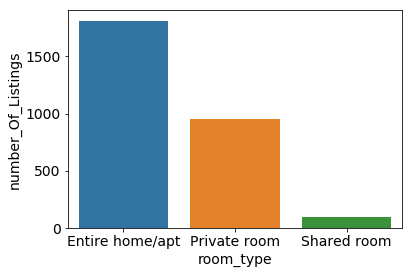

In [16]:
sns.barplot(x=room_type_1['room_type'],y=room_type_1['number_Of_Listings'])
plt.show()

In [18]:
room_property_type = data_l.groupby(['property_type','room_type']).price.mean()
room_property_type = room_property_type.reset_index()
room_property_type=room_property_type.sort_values('price',ascending=[0])
room_property_type.head()

,property_type,room_type,price
6,Boat,Entire home/apt,513.333333
20,House,Entire home/apt,194.698166
30,Townhouse,Entire home/apt,189.818182
23,Loft,Entire home/apt,178.933333
16,Condominium,Entire home/apt,170.490566


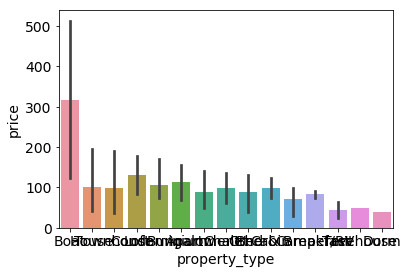

In [19]:
#function to clean and convert str columns to numeric
sns.barplot(x=room_property_type['property_type'],y=room_property_type['price'])
plt.show()

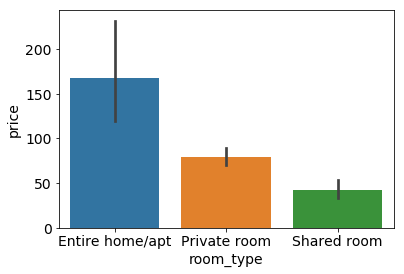

In [20]:
sns.barplot(x=room_property_type['room_type'],y=room_property_type['price'])
plt.show()

In [21]:
bedroom_df = data_l.groupby(['bedrooms']).price.mean()
bedroom_df = bedroom_df.reset_index()
bedroom_df=bedroom_df.sort_values('price',ascending=[0])
bedroom_df.head()

,bedrooms,price
5,6.0,578.166667
4,5.0,455.529412
6,7.0,375.000000
3,4.0,310.750000
2,3.0,252.466102


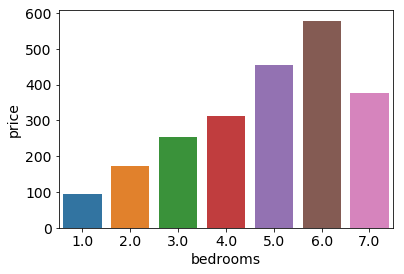

In [22]:
sns.barplot(x=bedroom_df['bedrooms'],y=bedroom_df['price'])
plt.show()

In [23]:
review_scores_df = data_l.groupby(['review_scores_rating']).price.mean()
review_scores_df = review_scores_df.reset_index()
review_scores_df=review_scores_df.sort_values('price',ascending=[0])
review_scores_df.head()

,review_scores_rating,price
3,55.0,249.000000
2,53.0,245.000000
16,76.0,228.500000
5,60.0,164.200000
40,100.0,149.963483


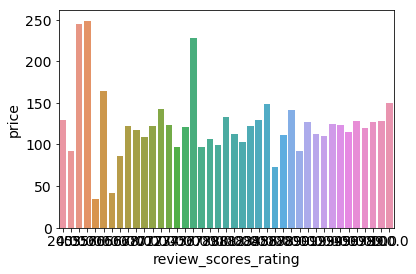

In [24]:
sns.barplot(x=review_scores_df['review_scores_rating'],y=review_scores_df['price'])
plt.show()

# 4.Variables impacting Price through Linear Regression model technique.

In [3]:
# changing null values with 0
data_l.fillna(0, inplace=True)

In [4]:
#Extracting prices from the table
price = data_l['price']
prices=[]

In [5]:
#changing the price into float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

In [6]:
#replace the price column with the new column
data_l['price']=prices

In [7]:
#Selecting only numerical variables as Linear regression works on only numeric variables
inputDF=data_l[['review_scores_rating','reviews_per_month','number_of_reviews','bedrooms','beds','longitude','latitude']]

In [8]:
#Defining x and y variables
x = inputDF
y = data_l['price']

In [10]:
#Slitting the data in train and test in the ration of 75:25
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0, train_size = .75)

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
model =  LinearRegression()

model.fit(x_train,y_train)

pred_train = model.predict(x_train)
pred_val = model.predict(x_test)

In [12]:
print(f'  Training RMSE: {np.sqrt(mean_squared_error(y_train, pred_train)):.2f}')
print(f'Validation RMSE: {np.sqrt(mean_squared_error(y_test, pred_val)):.2f}')

  Training RMSE: 65.28
Validation RMSE: 74.66


In [13]:
#checking the correlation between different factors and price
model.coef_

array([  1.64836879e-02,  -3.44468825e+00,  -4.82131507e-02,
         3.89516978e+01,   2.26941030e+01,  -1.74576187e+02,
        -1.06006475e+02])

In [16]:
model =  LinearRegression()

model.fit(x_train,y_train)

importance=model.coef_
importance=np.sort(importance)
importance

array([ -1.74576187e+02,  -1.06006475e+02,  -3.44468825e+00,
        -4.82131507e-02,   1.64836879e-02,   2.26941030e+01,
         3.89516978e+01])

In [22]:
for index,val in enumerate(importance):
    print("feature: {} has score:{}".format(index,val))

feature: 0 has score:-174.57618742450532
feature: 1 has score:-106.00647508439266
feature: 2 has score:-3.4446882515842434
feature: 3 has score:-0.04821315073019269
feature: 4 has score:0.01648368788889088
feature: 5 has score:22.694102989843085
feature: 6 has score:38.95169778310046


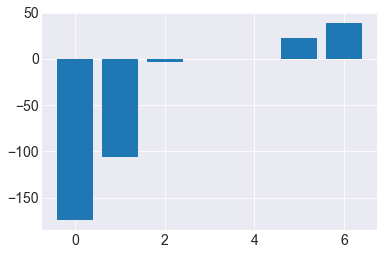

In [23]:
#plotting the factors and their score in ascending order

sns.set_style("darkgrid")
plt.bar([i for i in range(len(importance))],importance)
plt.show()